/home/hy/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hy/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hy/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20070 (\N{CJK UNIFIED IDEOGRAPH-4E66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hy/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/hy/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  fig.c

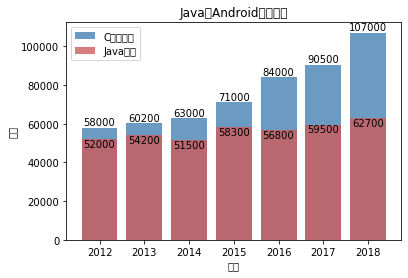

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x_data = ['2012', '2013', '2014', '2015', '2016', '2017', '2018']
y_data = [58000, 60200, 63000, 71000, 84000, 90500, 107000]
y_data2 = [52000, 54200, 51500,58300, 56800, 59500, 62700]

plt.bar(x=x_data, height=y_data, label='C语言基础', color='steelblue', alpha=0.8)
plt.bar(x=x_data, height=y_data2, label='Java基础', color='indianred', alpha=0.8)
# 在柱状图上显示具体数值, ha参数控制水平对齐方式, va控制垂直对齐方式
for x, y in enumerate(y_data):
    plt.text(x, y + 100, '%s' % y, ha='center', va='bottom')
for x, y in enumerate(y_data2):
    plt.text(x, y + 100, '%s' % y, ha='center', va='top')
# 设置标题
plt.title("Java与Android图书对比")
# 为两条坐标轴设置名称
plt.xlabel("年份")
plt.ylabel("销量")
# 显示图例
plt.legend()
plt.show()


In [2]:
import numpy as np
import pandas as pd
from utils import *

num_days = 2431
num_stocks = 1931  # or 1271
stock_list_path = "./data/stock_codes_1931.txt"
date_list_path = "./data/trading_opendays_2431.txt"
stock_id_map = get_stock_id_mapping(stock_list_path)
days_id_map = get_days_id_mapping(date_list_path)


In [3]:
stock_cnt = [0 for i in range(len(days_id_map))]

for stock_code in stock_id_map.keys():
    cur_prices = pd.read_csv('./data/hfq_price/'+stock_code+'.csv')
    for idx, row in cur_prices.iterrows():
        trade_date_id = days_id_map.get(str(row['trade_date']), -1)
        if trade_date_id == -1:
            continue
        stock_cnt[trade_date_id] += 1
    

In [4]:
print(stock_cnt)

[1215, 1213, 1217, 1212, 1204, 1211, 1217, 1219, 1218, 1190, 1221, 1214, 1212, 1221, 1216, 1208, 1222, 1225, 1215, 1217, 1215, 1224, 1225, 1233, 1222, 1217, 1226, 1230, 1227, 1240, 1236, 1225, 1236, 1226, 1208, 1221, 1211, 1218, 1229, 1222, 1225, 1233, 1229, 1234, 1230, 1227, 1234, 1231, 1221, 1229, 1222, 1226, 1228, 1219, 1214, 1222, 1216, 1207, 1232, 1218, 1221, 1227, 1219, 1214, 1211, 1229, 1235, 1210, 1187, 1216, 1195, 1223, 1199, 1195, 1206, 1204, 1200, 1213, 1214, 1229, 1224, 1223, 1204, 1205, 1205, 1208, 1209, 1205, 1207, 1167, 1205, 1185, 1183, 1209, 1212, 1199, 1212, 1182, 1202, 1226, 1225, 1211, 1213, 1223, 1217, 1226, 1214, 1215, 1190, 1191, 1214, 1207, 1210, 1224, 1201, 1183, 1188, 1204, 1230, 1230, 1218, 1222, 1223, 1225, 1217, 1216, 1231, 1231, 1218, 1217, 1222, 1221, 1223, 1221, 1219, 1208, 1221, 1210, 1210, 1216, 1219, 1224, 1223, 1218, 1221, 1214, 1211, 1217, 1215, 1210, 1203, 1217, 1216, 1211, 1214, 1213, 1214, 1213, 1215, 1200, 1211, 1218, 1217, 1222, 1213, 1222, 121

In [11]:
list_cnt = [0 for i in range(len(days_id_map))]

s_list = pd.read_csv("./data/stock_main_list_2139_9.csv")
slist = s_list[s_list['list_date'] < 20191231]  # 1931
print(s_list.shape)
s_list.head()

for idx,row in s_list.iterrows():
    list_date = str(row['list_date'])
    if list_date < '20100101' or list_date > '20200101':
        continue
    list_date_id = days_id_map.get(list_date, -1)
    while list_date_id == -1 and list_date < '20200101':
        print(list_date)
        list_date = increment_date(list_date, 1)
        list_date_id = days_id_map.get(list_date, -1)
    if list_date_id == -1:
        continue
    list_cnt[list_date_id] += 1
    
# print(list_cnt)

(2139, 10)


In [12]:
print(list_cnt)

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 

In [13]:
print(sum(list_cnt))

659


In [39]:
for i, x in enumerate(stock_cnt):
    if x<1000:
        print(i, x)
print(stock_cnt[1330:1340])
# 20150708开始的三天
'''
2015年7月8日周三，沪指大幅低开，创业板指和深成指更是以一字跌停开盘。收盘上證指數大跌5.9%，險守3500點。滬深兩市合共有1,346隻A股停牌，佔總數2,808隻近一半。[63]从6月15日至7月8日，17个交易日沪指最大跌幅达34.9%，创业板指最大跌幅更达42.9%，超过半数公司股价跌幅更超过50%。[64]同日，中證監要求過去半年減持過公司股票的大股東及高層增持，而且要求所有上市公司的大股東停止沽貨，否則一律嚴肅處理。[65]

2015年7月8日，深證成指收盘11040.89點，較6月12日跌40.0%，達2015年最低。2015年7月9日，上證綜指盘中触及3373.54點，較6月12日盘中最高跌34.9%，達2015年最低。

2015年7月9日周四，沪指低开高走，早段低見3373.54点后探底回升，午后一度大涨近7%，收市升202.14点或5.76%，报3709.33点，创业板指封上涨停板。[66]

2015年7月10日周五，沪指高开高走，创业板指封上涨停板。

知乎问题：如何看待2015年7月8日中国股市大跌 https://www.zhihu.com/question/32018053
'''

1336 954
1337 881
1338 916
[1289, 1291, 1289, 1277, 1252, 1196, 954, 881, 916, 1154]


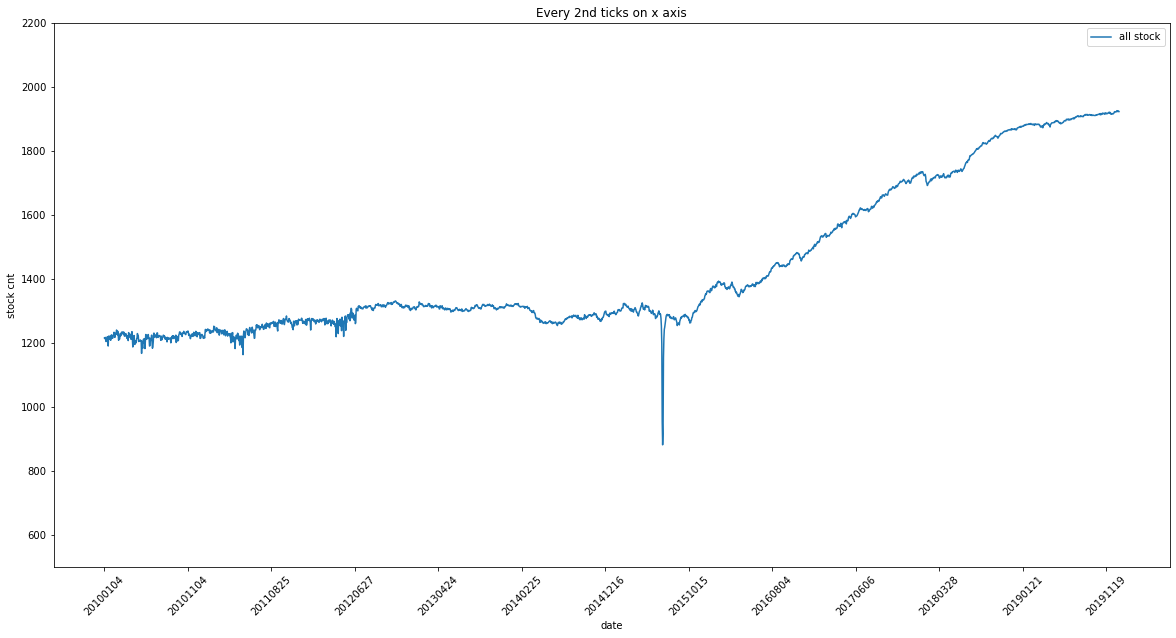

In [42]:
import matplotlib.pyplot as plt
import numpy as np

net_count = [stock_cnt[i]-list_cnt[i] for i in range(len(days_id_map))]
x = list(days_id_map.keys())
# fig, ax = plt.subplots(2,1)
plt.figure(figsize=(20,10))
ax = plt.axes()

ax.plot(x, stock_cnt, label='all stock')
# plt.bar(x=[int(i) for i in days_id_map.keys()], height=stock_cnt, label='all stocks', color='indianred')

ax.set_xticks(x[::200])
ax.set_xticklabels(x[::200], rotation=45)
ax.set_ylim((500,2200))
ax.set_title("Every 2nd ticks on x axis")


# 为两条坐标轴设置名称
ax.set_xlabel("date")
ax.set_ylabel("stock cnt")

# 显示图例
plt.legend()

plt.show()


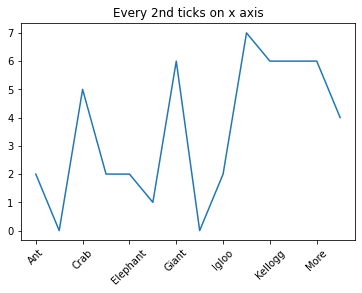

In [29]:
x = ["Ant", "Bob", "Crab", "Donkey", "Elephant", "Fire", "Giant","Hello",
     "Igloo", "Jump", "Kellogg","Llama", "More", "Night"]
y = np.random.randint(0,10,14)

ax = plt.axes()


ax.plot(x,y)
ax.set_xticks(x[::2])
ax.set_xticklabels(x[::2], rotation=45)
ax.set_title("Every 2nd ticks on x axis")

plt.show()